# Metaklasy w Pythonie - Droga do Singleton

## Cel

Zrozumieć jak zaimplementować wzorzec **Singleton** za pomocą metaklas.

**Plan:**
1. Zrozumieć czym są klasy (obiekty!)
2. Zobaczyć że klasy są tworzone przez `type`
3. Stworzyć pierwszą metaklasę
4. Nauczyć się kontrolować **tworzenie klasy** z poziomu metaklasy (`__new__`)
5. Nauczyć się kontrolować **tworzenie instancji** z poziomu metaklasy (`__call__`)
6. `__new__` vs `__call__`
7. Zaimplementować Singletona za pomocą metaklasy

## Krok 1: Klasy są obiektami

W Pythonie **wszystko** jest obiektem (wszystko dziedziczy po klasie `object`). Nawet klasy.

In [3]:
class User: pass  # klasa

user = User()  # instancja (obiekt)

In [7]:
# user jest obiektem klasy User - to nas nie dziwi
print(f"user jest obiektem klasy User: {isinstance(user, User)}")


user jest obiektem klasy User: True


In [8]:
# jakiej klasy obiektem jest user?
print(f"user jest obiektem klasy: {type(user)}")


user jest obiektem klasy: <class '__main__.User'>


In [6]:
# ale klasa też jest obiektem
print(f"Klasa User jest obiektem: {isinstance(User, object)}")


Klasa User jest obiektem: True


In [9]:
# obiektem jakiej klasy?
print(f"Klasa User jest obiektem klasy: {type(User)}")


Klasa User jest obiektem klasy: <class 'type'>


In [10]:
# czyli klasa User jest instancją klasy type
print(f"Klasa User jest obiektem klasy type: {isinstance(User, type)}")

Klasa User jest obiektem klasy type: True


In [11]:
# I dotyczy to wszystkich klas w Pythonie
print(f"Klasa int jest obiektem klasy type: {isinstance(int, type)}")

Klasa int jest obiektem klasy type: True


**Wniosek:** Klasa `User` to **instancja** klasy `type`.

Uwaga! Nie pomyl bycia instancją jakiejś klasy z dziedziczeniem po jakiejś klasie. Dziedziczenie to relacja dotycząca klas. Bycie instancją dotyczy obiektów.

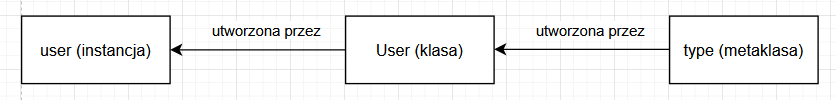

## Krok 2: `type` tworzy klasy

`type` ma **dwa zastosowania**:
1. `type(obj)` - zwraca typ obiektu
2. `type(name, bases, dict)` - **tworzy klasę**

In [12]:
# Normalny sposób definiowania klasy
class Dog:
    def bark(self):
        return "Woof!"


In [19]:
# Ten sam efekt używając type()
Cat = type(
    'Cat',                           # nazwa klasy
    (),                              # klasy bazowe (tuple)
    {'meow': lambda self: 'Meow!'}   # atrybuty (dict)
)


In [18]:
# Sprawdźmy
dog = Dog()
cat = Cat()

In [20]:
print(f"dog.bark(): {dog.bark()}")
print(f"cat.meow(): {cat.meow()}")

dog.bark(): Woof!
cat.meow(): Meow!


In [22]:
print(f"\nTyp Dog: {type(Dog)}")
print(f"Typ Cat: {type(Cat)}")

print(f"\nObie klasy utworzone przez type!")


Typ Dog: <class 'type'>
Typ Cat: <class 'type'>

Obie klasy utworzone przez type!


**Wniosek:** Kiedy piszesz `class Dog: ...`, Python wywołuje `type('Dog', (), {...})`

💡 **Pytanie:** Co jeśli chcemy **kontrolować** jak klasy są tworzone?

## Krok 3: Własna metaklasa

Metaklasa = klasa dziedzicząca po `type`

In [49]:
# tworzymy metaklasę
class FirstMeta(type):
    """User-defined metaclass"""
    ...

In [51]:
# tworzymy klasę
class MyFirstClass(metaclass=FirstMeta):
    ...

In [52]:
# instancją jakiej klasy jest nasza klasa?
print(type(MyFirstClass))

<class '__main__.FirstMeta'>


## Krok 4: metoda **__new__** metaklasy - kontrola tworzenia **klasy**

Za pomocą metody **\_\_new\_\_** metaklasy możemy kontrolować tworzenie **klasy** z poziomu metaklasy. 

In [42]:
class TrackerMeta(type):
    """Metaklasa która śledzi tworzenie klas"""
    
    def __new__(mcs, name, bases, dct):
        # mcs - metaklasa (metaclass), odpowiednik cls dla zwykłej klasy
        # name - string, nazwa tworzonej klasy (np. "User")
        # bases - tuple klas bazowych (np. (BaseClass,) lub () jeśli brak)
        # dct - dict atrybutów i metod klasy (np. {'x': 10, 'foo': <function>})
        
        print(f"Tworzę klasę {name}, która jest obiektem metaklasy {mcs.__name__}")
        
        # Standardowe tworzenie klasy
        cls = super().__new__(mcs, name, bases, dct)
        return cls


In [43]:
# Użycie metaklasy
class MyClass(metaclass=TrackerMeta):  # TU wykonywana jest metoda __new__ metaklasy
    x = 10
    def __new__(cls, *args, **kwargs):
        print(f"Tworzę obiekt klasy {cls.__name__}")

        return super().__new__(cls, *args, **kwargs)


Tworzę klasę MyClass, która jest obiektem metaklasy TrackerMeta


In [44]:
# Użycie klasy
my_class = MyClass()

Tworzę obiekt klasy MyClass


⚠️ **KLUCZOWE:** `TrackerMeta.__new__` wykonuje się **podczas definicji klasy** (`class MyClass:`), **NIE** podczas tworzenia instancji (`MyClass()`).

## Krok 5: Kiedy wykonuje się `__new__`?

Sprawdźmy to jeszcze raz, dokładnie.

In [46]:
class DebugMeta(type):
    def __new__(mcs, name, bases, dct):
        print(f"DebugMeta.__new__ - Tworzę KLASĘ {name}")
        return super().__new__(mcs, name, bases, dct)

print("1. Przed definicją klasy")

class Product(metaclass=DebugMeta):
    pass

print("2. Po definicji klasy")

print("\n3. Przed utworzeniem instancji p")
p = Product()
print("4. Po utworzeniu instancji p")

print("\n5. Przed utworzeniem drugiej instancji p2")
p2 = Product()
print("6. Po utworzeniu drugiej instancji p2")

1. Przed definicją klasy
DebugMeta.__new__ - Tworzę KLASĘ Product
2. Po definicji klasy

3. Przed utworzeniem instancji p
4. Po utworzeniu instancji p

5. Przed utworzeniem drugiej instancji p2
6. Po utworzeniu drugiej instancji p2


**Obserwacja:** `__new__` wykonał się **tylko raz** - podczas `class Product:`.

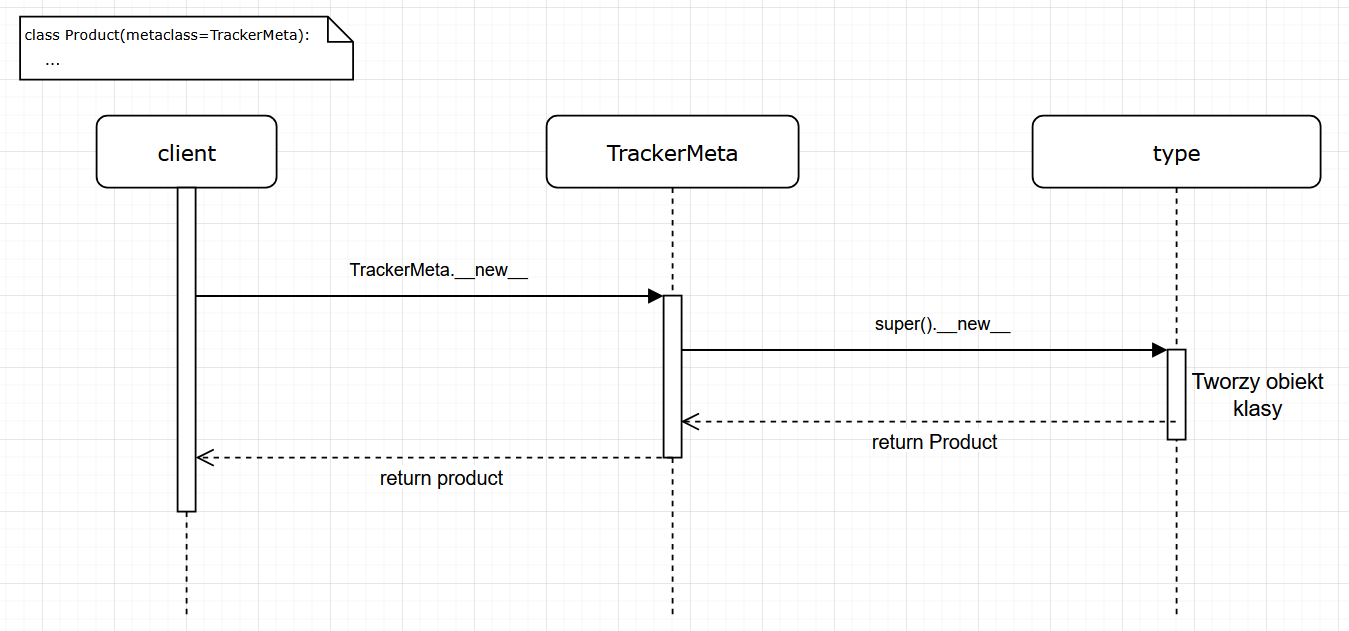

**Pytanie:** A jak kontrolować tworzenie **instancji** klasy z poziomu metaklasy? Da się?

## Krok 5: metoda `__call__` - kontrola tworzenia **instancji**

Kiedy robisz `Product()`, Python wywołuje `type(Product).__call__()`, czyli woła metodę `__call__` metaklasy. Metoda `__call__` metaklasy woła metodę `__new__`  (tzw. konstruktor) klasy, a metoda `__new__` klasy woła metodę `__init__` (tzw. inicjalizator) klasy.

In [57]:
# metaklasa
class CallTrackerMeta(type):
    def __call__(cls, *args, **kwargs):
        print(f"CallTrackerMeta.__call__ - Tworzę instancję {cls.__name__}")
        
        # Standardowe tworzenie instancji
        instance = super().__call__(*args, **kwargs)
        return instance

In [58]:
# klasa
class Service(metaclass=CallTrackerMeta):
    def __init__(self):
        print(f"Service.__init__ - Inicjalizuję instancję")


In [59]:
# Usage
print("=== Tworzenie pierwszej instancji ===")
s1 = Service()

print("\n=== Tworzenie drugiej instancji ===")

s2 = Service()

=== Tworzenie pierwszej instancji ===
CallTrackerMeta.__call__ - Tworzę instancję Service
Service.__init__ - Inicjalizuję instancję

=== Tworzenie drugiej instancji ===
CallTrackerMeta.__call__ - Tworzę instancję Service
Service.__init__ - Inicjalizuję instancję


**Obserwacja:** `__call__` wykonuje się **za każdym razem** gdy robisz `Service()`.

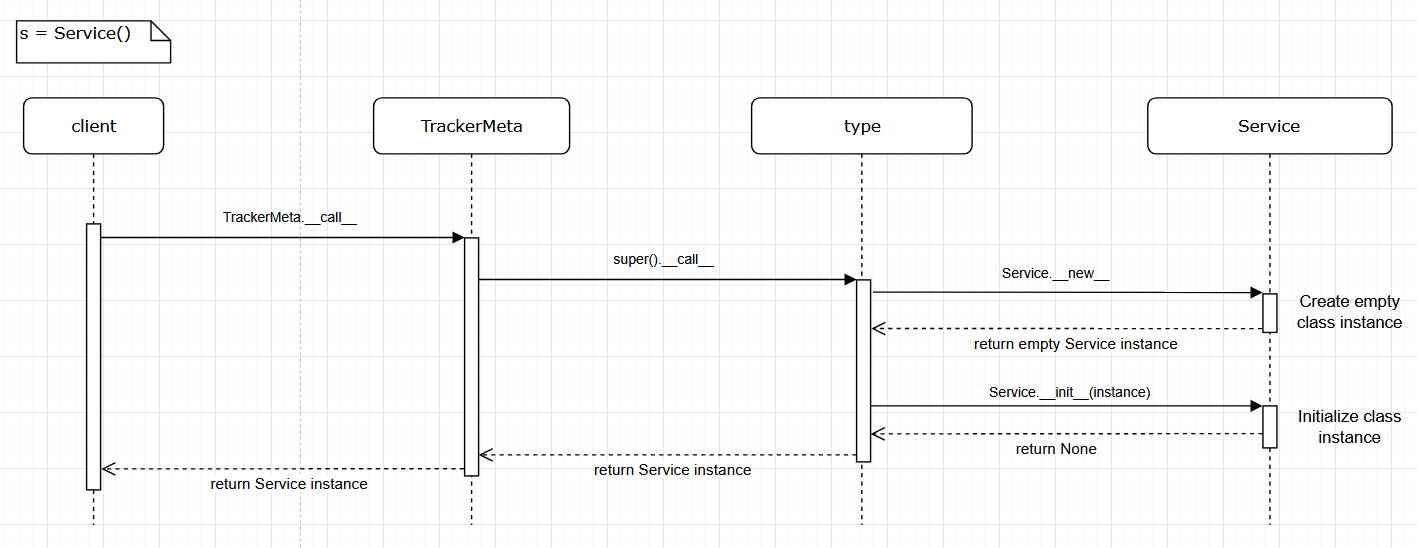

**Wniosek:** W `__call__` możemy **kontrolować** czy zwrócić nową instancję czy istniejącą!

## Krok 6: Porównanie `__new__` vs `__call__`

Zobaczmy oba naraz.

In [61]:
class CompleteMeta(type):
    def __new__(mcs, name, bases, dct):
        print(f"1️⃣  __new__ - Tworzę KLASĘ {name}")
        return super().__new__(mcs, name, bases, dct)
    
    def __call__(cls, *args, **kwargs):
        print(f"2️⃣  __call__ - Tworzę INSTANCJĘ {cls.__name__}")
        instance = super().__call__(*args, **kwargs)
        return instance

In [62]:
print("=== KROK A: Definicja klasy ===")
class Box(metaclass=CompleteMeta):
    def __init__(self):
        print(f"3️⃣  __init__ - Inicjalizuję instancję")

=== KROK A: Definicja klasy ===
1️⃣  __new__ - Tworzę KLASĘ Box


In [63]:
print("\n=== KROK B: Pierwsza instancja ===")
box1 = Box()


=== KROK B: Pierwsza instancja ===
2️⃣  __call__ - Tworzę INSTANCJĘ Box
3️⃣  __init__ - Inicjalizuję instancję


In [65]:
print("\n=== KROK C: Druga instancja ===")
box2 = Box()


=== KROK C: Druga instancja ===
2️⃣  __call__ - Tworzę INSTANCJĘ Box
3️⃣  __init__ - Inicjalizuję instancję


## Krok 7: Singleton - kontrola liczby instancji

**Idea:** W `__call__` sprawdzamy czy instancja już istnieje.
- Jeśli NIE → tworzymy nową
- Jeśli TAK → zwracamy istniejącą

In [1]:
class SingletonMeta(type):
    """Metaklasa implementująca Singleton"""
    
    _instances = {}  # Słownik: klasa → instancja
    
    def __call__(cls, *args, **kwargs):
        # Sprawdź czy instancja już istnieje
        if cls not in cls._instances:
            print(f"Tworzę NOWĄ instancję {cls.__name__}")
            # Utwórz nową instancję
            instance = super().__call__(*args, **kwargs)
            # Zapisz ją
            cls._instances[cls] = instance
        else:
            print(f"Zwracam ISTNIEJĄCĄ instancję {cls.__name__}")
        
        # Zawsze zwróć tę samą instancję
        return cls._instances[cls]

# Klasa używająca Singleton
class Database(metaclass=SingletonMeta):
    def __init__(self):
        print(f"Łączę się z bazą danych")
        self.connection = "Connected"

print("=== Pierwsze użycie ===")
db1 = Database()

print("\n=== Drugie użycie ===")
db2 = Database()

print("\n=== Trzecie użycie ===")
db3 = Database()

print(f"\ndb1 is db2: {db1 is db2}")
print(f"db2 is db3: {db2 is db3}")
print(f"Wszystkie to ten sam obiekt: {db1 is db2 is db3}")

=== Pierwsze użycie ===
Tworzę NOWĄ instancję Database
Łączę się z bazą danych

=== Drugie użycie ===
Zwracam ISTNIEJĄCĄ instancję Database

=== Trzecie użycie ===
Zwracam ISTNIEJĄCĄ instancję Database

db1 is db2: True
db2 is db3: True
Wszystkie to ten sam obiekt: True


**Kluczowa obserwacja:** Przy drugim wywołaniu:
- `__call__` się wykonuje
- `__init__` się **NIE** wykonuje

Dlaczego? Bo `super().__call__()` (które wywołuje `__init__`) jest **wewnątrz** `if` - wykonuje się tylko raz!

## Podsumowanie

### Dlaczego metaklasy do Singleton?

1. **Klasy są obiektami** - tworzone przez `type`
2. **`__new__`** kontroluje tworzenie **klasy** (wykonuje się raz)
3. **`__call__`** kontroluje tworzenie **instancji** (wykonuje się przy każdym `MyClass()`)
4. **Singleton** wykorzystuje `__call__` żeby:
   - Sprawdzić czy instancja istnieje
   - Jeśli nie → utworzyć i zapisać
   - Jeśli tak → zwrócić istniejącą

### Kluczowe metody metaklasy:

```python
class MyMeta(type):
    def __new__(mcs, name, bases, dct):
        # Wykonuje się podczas: class MyClass(metaclass=MyMeta)
        # Kontroluje jak KLASA jest tworzona
        return super().__new__(mcs, name, bases, dct)
    
    def __call__(cls, *args, **kwargs):
        # Wykonuje się podczas: MyClass()
        # Kontroluje jak INSTANCJA jest tworzona
        return super().__call__(*args, **kwargs)
```

### Singleton przez metaklasę:

```python
class SingletonMeta(type):
    _instances = {}
    
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            cls._instances[cls] = super().__call__(*args, **kwargs)
        return cls._instances[cls]

class MyClass(metaclass=SingletonMeta):
    pass
```

### Alternatywy (prostsze):

**Uwaga:** W większości przypadków metaklasy są **przesadą**. Rozważ:
- Dekorator klasy
- `__new__` w samej klasie
- Moduł-singleton (plik `.py` jako singleton)

**Metaklasy używaj tylko gdy:**
- Musisz kontrolować tworzenie **wielu** klas
- Chcesz automatycznej rejestracji podklas
- Potrzebujesz globalnej kontroli (np. wszystkie klasy muszą mieć Singleton)